In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train = 'drive/MyDrive/Data/train'
test = 'drive/MyDrive/Data/test'
valid = 'drive/MyDrive/Data/valid'

In [ ]:
import tensorflow as tf
from keras import layers

from keras import models
from keras import optimizers
from keras.callbacks import EarlyStopping
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import ModelCheckpoint

In [ ]:
!pip install pyyaml h5py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
model = models.Sequential()

In [ ]:
model.add(layers.Conv2D(16,(3,3),activation = 'relu',input_shape = (150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation = 'relu',input_shape = (150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        9280      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 82944)             0         
                                                                 
 dense (Dense)               (None, 32)                2

In [ ]:
model.compile(loss = 'binary_crossentropy',
              optimizer = optimizers.RMSprop(lr = 1e-4),
              metrics=['accuracy'])

/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
model_path = "training_1/cp.ckpt"
checkpoint = ModelCheckpoint(filepath=model_path,
                            save_weights_only=True,
                            monitor='val_accuracy',
                            save_best_only=True, verbose=1)

earlystop = EarlyStopping(monitor = 'val_loss',
                          min_delta = 0,
                          patience = 6,
                          verbose = 1,
                          restore_best_weights = True)

learning_rate_reduction =ReduceLROnPlateau(monitor='val_loss',
                                            patience=6,
                                            verbose=1,
                                            factor=0.2,
                                            min_lr=0.00000001)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255.)
test_datagen = ImageDataGenerator(rescale = 1./255.)

train_generator = train_datagen.flow_from_directory(train, target_size=(150,150),
                                                    batch_size=20,
                                                    class_mode='binary')

valid_generator = train_datagen.flow_from_directory(valid, target_size=(150,150),
                                                    batch_size=20,
                                                    class_mode='binary')

Found 1622 images belonging to 2 classes.
Found 216 images belonging to 2 classes.


In [ ]:
def augment(img):
  #take a random b/w 0-1 if it is  > 0.25
  # rotate image by (-25,25) degree
  # add gausion noice blur
  # shift the image by -15, 15 in x and y direction
  # return img
  pass

In [ ]:
# for 30% of random img in train_gen data aug it and append it with label and original image
# check size, it should be x + 0.3 x

In [ ]:
history = model.fit(train_generator,epochs=10,validation_data = valid_generator, callbacks=[earlystop, checkpoint, learning_rate_reduction])

Epoch 1/10
82/82 [==============================] - ETA: 0s - loss: 0.2666 - accuracy: 0.8970
Epoch 1: val_accuracy improved from -inf to 0.91204, saving model to training_1/cp.ckpt
82/82 [==============================] - 344s 4s/step - loss: 0.2666 - accuracy: 0.8970 - val_loss: 0.1770 - val_accuracy: 0.9120 - lr: 1.0000e-04
Epoch 2/10
82/82 [==============================] - ETA: 0s - loss: 0.1282 - accuracy: 0.9599
Epoch 2: val_accuracy improved from 0.91204 to 0.95370, saving model to training_1/cp.ckpt
82/82 [==============================] - 79s 964ms/step - loss: 0.1282 - accuracy: 0.9599 - val_loss: 0.1242 - val_accuracy: 0.9537 - lr: 1.0000e-04
Epoch 3/10
82/82 [==============================] - ETA: 0s - loss: 0.0928 - accuracy: 0.9686
Epoch 3: val_accuracy improved from 0.95370 to 0.96296, saving model to training_1/cp.ckpt
82/82 [==============================] - 79s 963ms/step - loss: 0.0928 - accuracy: 0.9686 - val_loss: 0.1212 - val_accuracy: 0.9630 - lr: 1.0000e-04
Epo

In [ ]:
score = model.evaluate(valid_generator, batch_size=32)
print(score)

validation_loss, validation_Accuracy = score
print('Validation Loss',validation_loss)
print('Validation Accuracy',validation_Accuracy)


11/11 [==============================] - 11s 1s/step - loss: 0.0244 - accuracy: 0.9907
[0.024351712316274643, 0.9907407164573669]
Validation Loss 0.024351712316274643
Validation Accuracy 0.9907407164573669


In [ ]:
test_generator = test_datagen.flow_from_directory(test, target_size=(150,150),
                                                    batch_size=20,
                                                    class_mode='binary')

Found 386 images belonging to 2 classes.


In [ ]:
score = model.evaluate(test_generator, batch_size=32)
print(score)

testing_loss, testing_Accuracy = score
print('Testing Loss:',testing_loss)
print('Testing Accuracy:',testing_Accuracy)

20/20 [==============================] - 71s 4s/step - loss: 0.0202 - accuracy: 0.9948
[0.020220395177602768, 0.9948186278343201]
Testing Loss: 0.020220395177602768
Testing Accuracy: 0.9948186278343201


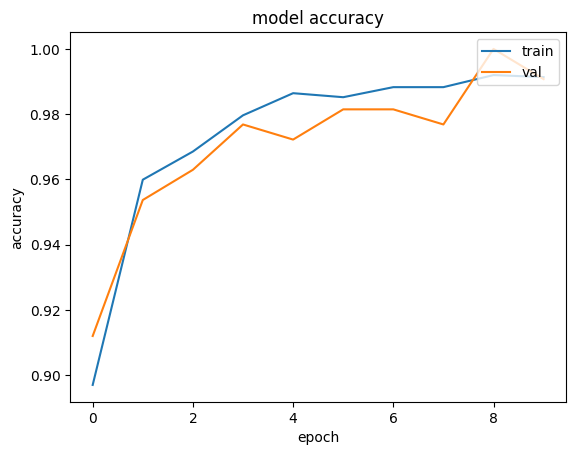

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

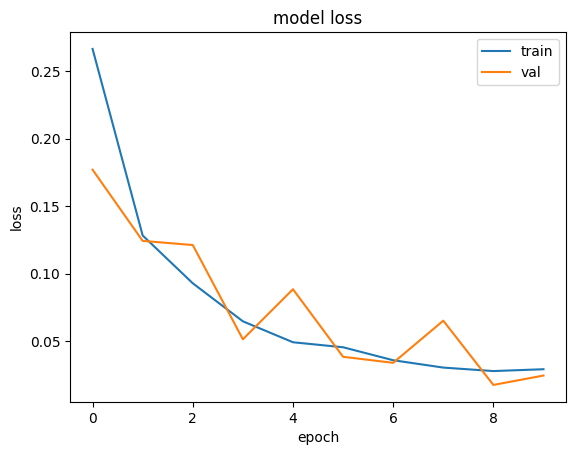

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [ ]:
!mkdir -p saved_model
model.save('saved_model/my_model')

In [ ]:
# my_model directory
!ls saved_model

# Contains an assets folder, saved_model.pb, and variables folder.
!ls saved_model/my_model


my_model
assets	fingerprint.pb	keras_metadata.pb  saved_model.pb  variables
